In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Notebook updates:
* (25/09/26) Typo in f(x):
```
(old version)
return x[0]**2 + 10*x[1]**4

(new version)
return x[0]**2 + 10*x[1]**2
```

* (25/09/27) there is no plot_convergence(your_output) function. Use plt.plot() to see the convergence.
* (25/09/27) Use 50 steps instead of 20 for part 1 SGD!
* (25/09/28) Directly added Hw2 util functions for flower data part.

# Part 1: Adaptive gradient methods (4 points)

In the past problem sets, we explored different approaches to implementing gradient descent (hand-written backpropagation, autodiff). In this assignment, we will shift our focus to optimization methods—specifically, algorithms that use gradients to update model weights.

You will implement the following optimizers:

* Stochastic Gradient Descent (SGD)
* SGD with Momentum
* Adam
* AdamW

We are optimizing the following function:

$$f(x, y) = x^2 + 10y^2$$

A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

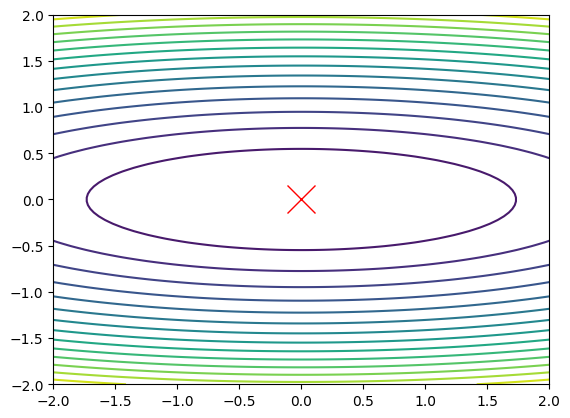

In [3]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()


As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing:

```Python
plot_contour()
plt.plot(x, y, '-')
```

<!-- 1. Show that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newtons-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$? -->

In [4]:
def f(x):
    return x[0]**2 + 10*x[1]**2

def get_gradient(x): # df()
    return np.array([2, 20])*x

def minimize(initial, optimizer, N=100):
    x = np.zeros((N, len(initial)))
    x[0, :] = initial
    for n in range(1, N):
        g = get_gradient(x[n-1])
        x[n] = optimizer.step(g, x[n - 1], n)
    return x

## 1.a. SGD (1 point)

1. Complete the step function in SGD class.
2. Find one "good" learning rate that minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 50 steps.
3. (not graded) Also, try finding one learning rate where optimization diverges (not graded)!

You can visualize the convergence by doing
```
your_output = minimize([2, 1], SGD(eta=your_eta), num_steps)
plot_contour()
plt.plot(your_output[:, 0], out[:, 1], '-')

```

In [5]:
class SGD:
    def __init__(self, eta):
        self.eta = eta

    def step(self, gradient: np.array, x: np.array, t: int):
        new_x = []
        ############ TODO: Complete the step function ############
        # Return the updated value (array) of x
        new_x = x - self.eta * gradient
        ##########################################################

        return new_x


Final tolerance: 0.00012097168918702143
With tolerance: True


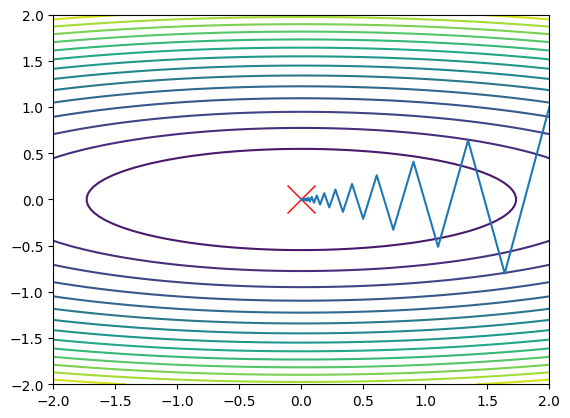

In [143]:
############ FOR YOUR INFORMATION ############
plot_contour()

out = minimize([2,1], SGD(0.09), 50)
plt.plot(out[:, 0], out[:, 1], '-')

final_point = out[-1]
tolerance = np.linalg.norm(final_point - np.array([0, 0]))
print("Final tolerance:", tolerance)
print("With tolerance:", tolerance < 1e-3)

In [144]:
##################### FOR ANSWER FOR SGD HYPERPARAMETER #####################
PART1_SGD_HYPERPARAMETER = {
    'eta': 0.09
}
#############################################################################

## 1.b SGD with momentum (1 point)

1. Complete the step function in SGDMomentum class.
2. Experiment with learning rate and beta parameters that minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using under 100 steps.
3. (not graded) What is the largest and the smallest learning rate you can find when optimizing for 100 steps and still converge near the minumum?

In [152]:
class SGDMomentum:
    def __init__(self, eta, beta):
        self.eta = eta
        self.beta = beta
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:int):
        new_x = []
        ############ TODO: Complete the step function ############
        key = gradient.shape
        if key not in self.state:
            self.state[key] = np.zeros_like(x)

        v = self.state[key]
        v = self.beta * v + gradient
        self.state[key] = v

        new_x = x - self.eta * v
        ##########################################################
        return new_x

Final tolerance: 0.00042741977589070656
With tolerance: True


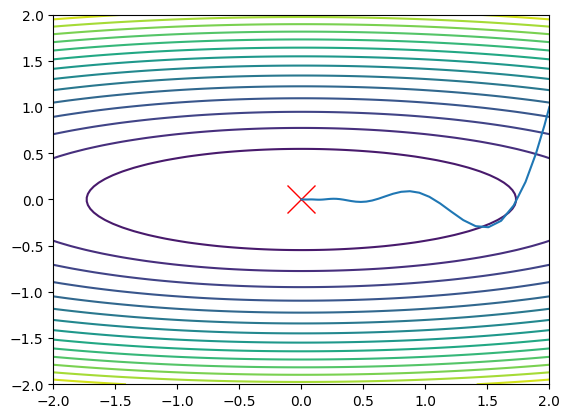

In [169]:
##################### YOUR ANSWER FOR SGDMOMENTUM HYPERPARAMETER #############
PART1_SGDMOMENTUM_HYPERPARAMETER = {
    'eta': 0.01,
    'beta': 0.7,
}
#############################################################################

plot_contour()

out = minimize([2,1],
               SGDMomentum(PART1_SGDMOMENTUM_HYPERPARAMETER["eta"],
                           PART1_SGDMOMENTUM_HYPERPARAMETER["beta"]),
               100)
plt.plot(out[:, 0], out[:, 1], '-')

final_point = out[-1]
tolerance = np.linalg.norm(final_point - np.array([0, 0]))
print("Final tolerance:", tolerance)
print("With tolerance:", tolerance < 1e-3)

## 1.c Adam (1 point)

1. Implement the step function in Adam class.
2. Try changing the learning rate to the largest value you found that worked for Momentum with 100 steps. Does Adam find the solution in 100 steps with this value? Experiment with learning rate, beta parameters, and epsilon to minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 100 steps.

In [170]:
class Adam:
    def __init__(self, eta, beta1, beta2, epsilon):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:np.array):
        new_x = []
        ################### TODO: Complete the function below  ###################
        key = gradient.shape
        if key not in self.state:
            self.state[key] = {
                "v": np.zeros_like(x),
                "s": np.zeros_like(x)
            }

        v = self.state[key]["v"]
        s = self.state[key]["s"]

        v = self.beta1 * v + (1.0 - self.beta1) * gradient
        s = self.beta2 * s + (1.0 - self.beta2) * np.square(gradient)
        self.state[key]["v"] = v
        self.state[key]["s"] = s

        v_hat = v / (1.0 - np.pow(self.beta1, t))
        s_hat = s / (1.0 - np.pow(self.beta2, t))

        g_prime = self.eta * v_hat / (np.sqrt(s_hat) + self.epsilon)

        new_x = x - g_prime
        ##########################################################################
        return new_x

Final tolerance: 8.893848735880843e-07
With tolerance: True


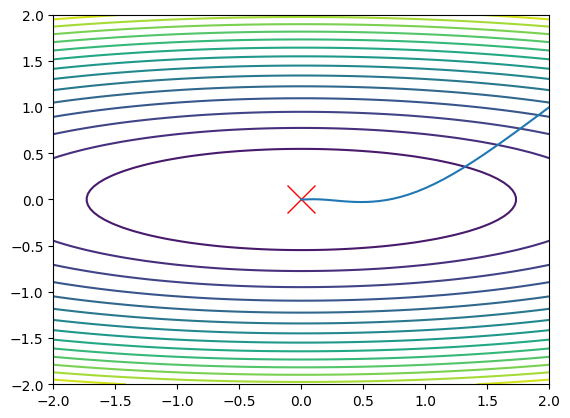

In [175]:
##################### FOR Grading #####################
PART1_ADAM_HYPERPARAMETER = {
    'eta': 0.09,
    'beta1': 0.7,
    'beta2': 0.999,
    'epsilon': 1e-8
}
#######################################################

plot_contour()

out = minimize([2,1],
               Adam(PART1_ADAM_HYPERPARAMETER["eta"],
                    PART1_ADAM_HYPERPARAMETER["beta1"],
                    PART1_ADAM_HYPERPARAMETER["beta2"],
                    PART1_ADAM_HYPERPARAMETER["epsilon"]),
               100)
plt.plot(out[:, 0], out[:, 1], '-')

final_point = out[-1]
tolerance = np.linalg.norm(final_point - np.array([0, 0]))
print("Final tolerance:", tolerance)
print("With tolerance:", tolerance < 1e-3)

## 1.d AdamW (1 points)

While the implementation is similar to Adam, it differs in one key aspect: AdamW applies weight decay in the final parameter update (one line of change!):

$$
\theta_{t+1} = \theta_t - \eta \cdot \left( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda \theta_t \right)
$$

Where
$$
\theta_t \text{ : current parameters at step } t \\
\eta \text{ : learning rate} \\
\hat{m}_t \text{ : bias-corrected first moment estimate (mean of gradients)} \\
\hat{v}_t \text{ : bias-corrected second moment estimate (uncentered variance of gradients)} \\
\epsilon \text{ : small constant for numerical stability} \\
\lambda \text{ : weight decay coefficient (used only in AdamW)}
$$

Experiment with learning rate, beta parameters, and epsilon to minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 100 steps.

1. Complete the step function in AdamW class.
2. Experiment with learning rate, beta parameters, and epsilon to reach the desired minimum value.

In [176]:
class AdamW:
    def __init__(self, eta, beta1, beta2, epsilon, weight_decay):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.weight_decay = weight_decay
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:np.array):
        new_x = []
        ################### TODO: Complete the function below  ###################
        key = gradient.shape

        if key not in self.state:
            self.state[key] = {
                "v": np.zeros_like(x),
                "s": np.zeros_like(x),
            }

        v = self.state[key]["v"]
        s = self.state[key]["s"]

        v = self.beta1 * v + (1.0 - self.beta1) * gradient
        s = self.beta2 * s + (1.0 - self.beta2) * np.square(gradient)

        self.state[key]["v"] = v
        self.state[key]["s"] = s

        v_hat = v / (1.0 - np.pow(self.beta1, t))
        s_hat = s / (1.0 - np.pow(self.beta2, t))

        update = v_hat / (np.sqrt(s_hat) + self.epsilon) + self.weight_decay * x
        new_x = x - self.eta * update
        ############################################################################
        return new_x

Final tolerance: 2.817660032226552e-07
With tolerance: True


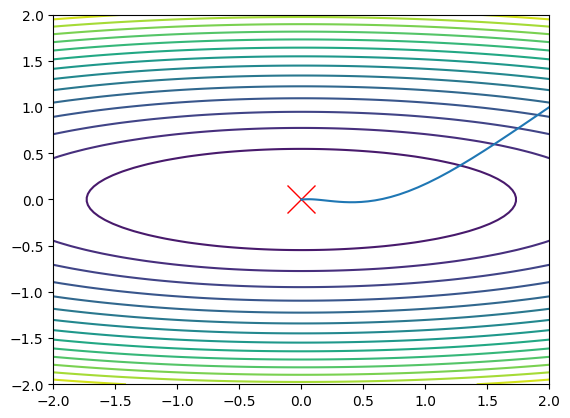

In [177]:
##################### FOR Grading #####################
PART1_ADAMW_HYPERPARAMETER = {
    'eta': 0.09,
    'beta1': 0.7,
    'beta2': 0.999,
    'epsilon': 1e-8,
    'weight_decay': 0.1
}
#######################################################

plot_contour()

out = minimize([2,1],
               AdamW(PART1_ADAMW_HYPERPARAMETER["eta"],
                     PART1_ADAMW_HYPERPARAMETER["beta1"],
                     PART1_ADAMW_HYPERPARAMETER["beta2"],
                     PART1_ADAMW_HYPERPARAMETER["epsilon"],
                     PART1_ADAMW_HYPERPARAMETER["weight_decay"]),
               100)
plt.plot(out[:, 0], out[:, 1], '-')

final_point = out[-1]
tolerance = np.linalg.norm(final_point - np.array([0, 0]))
print("Final tolerance:", tolerance)
print("With tolerance:", tolerance < 1e-3)

# Part 2: Optimization on MLP (Point 1.5)

In this section, we will reimplement the MLP model from week 2 and train it using the optimizers you have just built. You will observe how different optimizers behave under various weight initializations. We provide the default functions from week 2, as well as the helper functions **step_relu_network_with_optimizer** and **train_relu_mlp_with_optimizer**.

You should redefine the following functions from week 2:
* relu
* relu_derivatives
* Layer
* ReLUMLP
* compute_relu_mlp_forward_passes
* compute_relu_mlp_parameter_updates
* compute_relu_mlp_partial_derivatives

TODOs:
* Redefine the **update_parameters** function in this notebook to use the optimizer you implemented.
* Then, experiment with different hyperparameter settings for each optimizer to achieve a final loss < 1 within 100 training steps.


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

SEED = 42
np.random.seed(SEED)

In [74]:
### Utils from Week 2
# Don't modify this cell

def softmax(logits: np.array) -> np.array:
    ## Softmax function slightly modified from Homework 1 since data is d_features x N_samples
    logits = logits - np.max(logits, axis=0, keepdims=True)
    exp = np.exp(logits)
    res = exp / np.sum(exp, axis=0, keepdims=True)
    # Remember softmax outputs a vector with same dimensions as the logits
    assert logits.shape == res.shape
    return res


def cross_entropy_loss(probs: np.array, targets: np.array) -> float:
    #  Cross-entropy loss: -1/N * sum y log p (See homework 1)
    n = targets.shape[1]
    loss = -np.sum(targets * np.log(probs + 1e-8)) / n
    return loss

def generate_flower_data(
    n_samples: int = 1000, noise: float = 0.1, num_classes: int = 3, seed: int = 42
):
    rand = np.random.default_rng(seed)
    t = rand.uniform(0, 2 * np.pi, n_samples)

    # Petal shape: radius varies with class count
    r = 1 + 0.3 * np.sin(num_classes * t)

    x = r * np.cos(t) + noise * rand.standard_normal(n_samples)
    y = r * np.sin(t) + noise * rand.standard_normal(n_samples)

    X = np.stack([x, y], axis=1)

    # Assign class based on petal angle region
    labels = ((t % (2 * np.pi)) / (2 * np.pi) * num_classes * 2).astype(
        int
    ) % num_classes
    y = labels.reshape(-1, 1)

    return shuffle(X, y, random_state=seed)


def visualize_classification_data(features, labels, title: str = "Flower Dataset"):
    fig, ax = plt.subplots()
    ax.scatter(x=features[:, 0], y=features[:, 1], c=labels, cmap="viridis")
    plt.title(title)
    return fig, ax


In [75]:
######################## YOUR (COMPLETED) CODE FROM WEEK 2########################
def relu(x: np.array) -> np.array:
    ##########################################
    ## TODO: Compute ReLU activation,
    res = np.maximum(0, x)
    ##########################################
    assert res.shape == x.shape
    return res

def relu_derivative(x: np.array) -> np.array:
    ##########################################
    ## TODO: Compute the gradient of ReLU with respect to its inputs
    # res = ...
    res = (x > 0).astype(x.dtype)
    ##########################################
    assert res.shape == x.shape
    return res


class Layer:
    def __init__(self, input_dim, output_dim):
        # Don't change this!
        self.weights = np.random.randn(
            output_dim, input_dim
        ) * np.sqrt(2.0 / input_dim)
        self.biases = np.zeros((output_dim, 1))

    def __call__(self, X):
        ##########################################
        ## TODO: Compute the forward pass of the MLP
        ## Your Code
        # Compute (Wx + b)
        return self.weights @ X + self.biases
        ###########################################

class ReLUMLP:
    def __init__(self, layer_widths):
        self.layers = []
        ##########################################
        ## TODO: Create the layers of MLP
        for i in range(len(layer_widths) - 1):
            self.layers.append(Layer(layer_widths[i], layer_widths[i + 1]))
        ##########################################

    def __call__(self, X):
        res = X
        ##########################################
        ## TODO: Implement forward pass of the ReLU MLP
        ## Hint: Don't forget to apply ReLU after each layer except the last
        for i, layer in enumerate(self.layers):
            res = layer(res)
            if i < len(self.layers) - 1:
                res = relu(res)
        ##########################################
        return res

def compute_relu_mlp_forward_passes(
    network: ReLUMLP, inputs: np.array
) -> Tuple[List[np.array], List[np.array]]:
    layer_outputs = [inputs]
    pre_activations = [inputs]
    ##########################################
    ## TODO: Forward pass - compute each layer's pre-activations (h_l) and activations (z_l, after ReLU)
    # and store them for later use
    a = inputs
    for i, layer in enumerate(network.layers):
        h = layer(a)
        pre_activations.append(h)

        if i < len(network.layers) - 1:
            a = relu(h)
        else:
            a = h

        layer_outputs.append(a)
    ##########################################
    assert len(layer_outputs) == len(network.layers) + 1, (
        "Layer outputs should match number of layers"
    )
    assert len(pre_activations) == len(network.layers) + 1, (
        "Pre-activations should match number of layers"
    )
    return layer_outputs, pre_activations

def compute_relu_mlp_partial_derivatives(
    network: ReLUMLP, cost_partials: List[np.array], pre_activations
):
    for ind, (layer, pre_activation) in enumerate(
        zip(reversed(network.layers), reversed(pre_activations))
    ):
        ##########################################
        ## TODO: Compute the error signal propagated to each layer
        ## Hint: Cost partials: d z_l / d z_{l-1} = d z_l / d h_l * d h_l / d z_{l-1}
        dL_dz_l = cost_partials[-1]
        dzdh = relu_derivative(pre_activation)
        dL_dz_prev = layer.weights.T @ (dL_dz_l * dzdh)
        cost_partials.append(dL_dz_prev)
    ##########################################
    cost_partials.reverse()
    assert len(cost_partials) == len(network.layers) + 1, (
        "Cost partials should have one more element than layers"
    )

def compute_relu_mlp_parameter_updates(
    cost_partials: List[np.array],
    pre_activations: List[np.array],
    layer_outputs: List[np.array],
    inputs: np.array,
) -> Tuple[List[np.array], List[np.array]]:
    weight_gradients = []
    bias_gradients = []
    ##########################################
    ## TODO: Compute weight gradient
    for cost_partial, layer_output, pre_activation in zip(
        cost_partials[1:], layer_outputs[:-1], pre_activations[:-1]
    ):
        dW = (cost_partial @ relu(pre_activation).T)
        weight_gradients.append(dW)
    ##########################################
    ## TODO: Compute bias gradient
        db = np.sum(cost_partial, axis=1, keepdims=True)
        bias_gradients.append(db)
    ##########################################
    assert len(weight_gradients) == len(layer_outputs) - 1, (
        "Weight gradients should match number of layers"
    )
    assert len(bias_gradients) == len(layer_outputs) - 1, (
        "Bias gradients should match number of layers"
    )
    return weight_gradients, bias_gradients


##################################################################################

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Flower Dataset'}>)

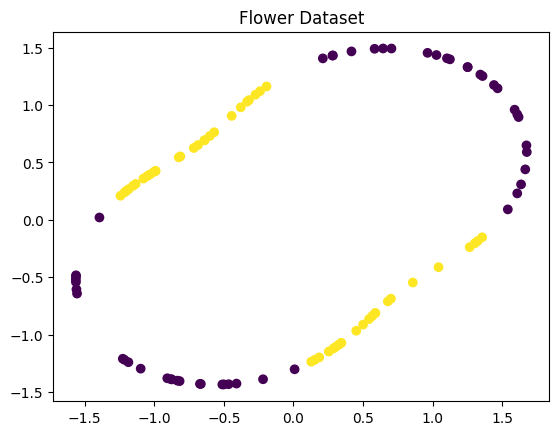

In [76]:
################ DO NOT MODIFY ################
NUM_CLASSES = 2
N_FEATURES = 2
NUM_SAMPLES = 100
np.random.seed(SEED)

flower_X, flower_y = generate_flower_data(
    num_classes=NUM_CLASSES, n_samples=NUM_SAMPLES, noise=0
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flower_X = scaler.fit_transform(flower_X)

visualize_classification_data(flower_X, flower_y)

In [77]:
############ DO NOT MODIFY ############
np.random.seed(SEED)
inputs = flower_X.T
targets = flower_y
targets = OneHotEncoder().fit_transform(targets).toarray().T

In [78]:
def update_parameters(
    network: ReLUMLP,
    weight_gradients: List[np.array],
    bias_gradients: List[np.array],
    optimizer,
    timestep
) -> None:

    ## TODO: Perform gradient descent by applying updates to the parameters
    ##########################################
    # Hint: call the optimizer step function, and then update the parameters.
    for layer, dW, db in zip(network.layers, weight_gradients, bias_gradients):
        layer.weights = optimizer.step(dW, layer.weights, timestep)
        layer.biases = optimizer.step(db, layer.biases, timestep)
    ##########################################

In [178]:
def get_optimizer(optimizer_class, **kwargs):
    return optimizer_class(**kwargs)

def step_relu_network_with_optimizer(network, inputs, targets, optimizer, timestep) -> float:
    layer_outputs, pre_activations = compute_relu_mlp_forward_passes(network, inputs)
    probs = softmax(layer_outputs[-1])
    ### Compute loss
    # Number of examples in the dataset
    n = targets.shape[1]
    ##  Cross-entropy: -1/N * sum y log p (See homework 1)
    loss = cross_entropy_loss(probs, targets)

    # backpropagation
    weight_gradients = []
    bias_gradients = []
    cost_partials = [1.0 / n * (probs - targets)]
    compute_relu_mlp_partial_derivatives(network, cost_partials, pre_activations)

    weight_gradients, bias_gradients = compute_relu_mlp_parameter_updates(
        cost_partials, pre_activations, layer_outputs, inputs
    )

    update_parameters(network, weight_gradients, bias_gradients, optimizer, timestep)
    return loss

def train_relu_mlp_with_optimizer(mlp, n_iterations: int, inputs, targets, optimizer):
    losses = []
    for i in range(n_iterations):
        loss = step_relu_network_with_optimizer(mlp, inputs, targets, optimizer, i+1)
        losses.append(loss)
    return losses

SGD final loss: 0.6155 Variance of loss: 0.03611558886393936
SGDMomentum final loss: 0.0640 Variance of loss: 0.02854220460333756
Adam final loss: 0.6480 Variance of loss: 0.04018680017851429
AdamW final loss: 0.6931 Variance of loss: 0.005083842806210829


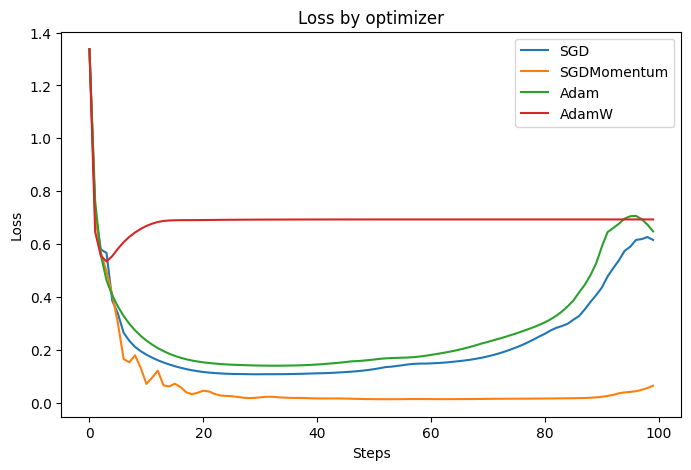

In [192]:
NUM_STEPS=100
NUM_CLASSES=2
################## YOUR HYPERPARAMETER SETTING HERE ########################
BEST_OPTIMIZER_SETTING_CASE1 = {
    'SGD': SGD(eta=np.random.rand(1)[0]),
    'SGDMomentum': SGDMomentum(eta=np.random.rand(1)[0], beta=np.random.rand(1)[0]),
    'Adam': Adam(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0]),
    'AdamW': AdamW(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0], weight_decay=np.random.rand(1)[0])
}
############################################################################

f, ax = plt.subplots(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE1:
    np.random.seed(SEED)
    relu_mlp = ReLUMLP([2, 16, NUM_CLASSES])
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE1[opt]
    losses = train_relu_mlp_with_optimizer(mlp=relu_mlp, n_iterations=NUM_STEPS, inputs=inputs, targets=targets, optimizer=myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    ax.plot(losses, label=myoptimizer.__class__.__name__)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.set_title("Loss by optimizer")

# Part 3: Impact of network initialization on convergence behavior (1 point)


In this section, experiment with different hyperparameter settings to observe how sensitive the model can be under poor network initialization. Then, implement Glorot initialization to see how a more stable weight initialization improves convergence and helps the model train more reliably.

Essentially, Glorot initialization chooses the range of the weights so that the variance of activations and gradients is roughly the same across layers. This helps prevent common issues of vanishing gradients or exploding gradients.

**TODOs:**

* Implement Glorot initialization:
$$
W_{ij} \sim \text{Uniform}\Big[-\text{limit}, \text{limit}\Big], \quad \text{limit} = \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}
$$

* Initialize the bias to be 0.


In [194]:
def init_mlp(seed, init_method, num_classes=NUM_CLASSES):
    """Builds an MLP with all weights = 1 (bad initialization)."""
    np.random.seed(seed)
    relu_mlp = ReLUMLP([2, 16, 16, num_classes])
    relu_mlp = init_method(relu_mlp)
    return relu_mlp

def init_ones(mlp):
    for l in mlp.layers:
        l.weights = np.ones_like(l.weights)
    return mlp

def init_large(mlp):
    for l in mlp.layers:
        l.weights *= 100
    return mlp

def init_glorot(mlp, SEED=42):
    np.random.seed(SEED) ## DO NOT MODIFY THE SEED
    for l in mlp.layers:
    ################## YOUR CODE ##################
        fan_in = l.weights.shape[1]
        fan_out = l.weights.shape[0]
        limit = np.sqrt(6 / (fan_in + fan_out))
        l.weights = np.random.uniform(-limit, limit, size=l.weights.shape)
        l.biases = np.zeros_like(l.biases)
    ###############################################
    return mlp

In [195]:
NUM_STEPS=100
############################## YOUR HYPERPAREMTER HERE (not graded) ##############################
BEST_OPTIMIZER_SETTING_CASE2={
    'SGD': SGD(eta=np.random.rand(1)[0]),
    'SGDMomentum': SGDMomentum(eta=np.random.rand(1)[0], beta=np.random.rand(1)[0]),
    'Adam': Adam(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0]),
    'AdamW': AdamW(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0], weight_decay=np.random.rand(1)[0])
}
######################################################################################

SGD final loss: 0.6931 Variance of loss: 0.08968473462741212
SGDMomentum final loss: 0.5092 Variance of loss: 0.1017317559734936
Adam final loss: 0.4663 Variance of loss: 0.10852973873355586
AdamW final loss: 0.6931 Variance of loss: 0.06900536735083267


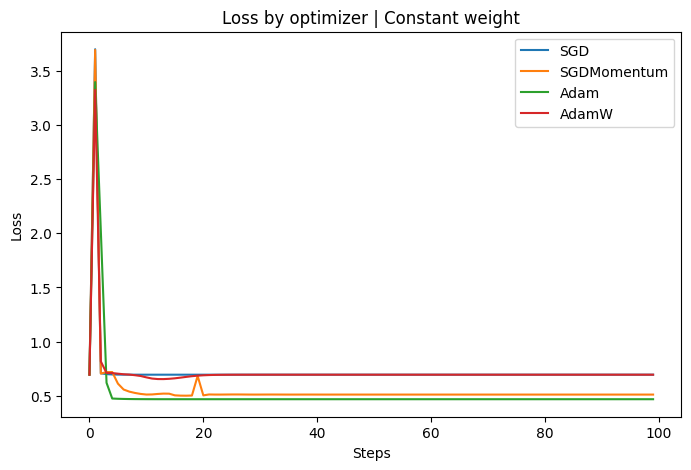

In [196]:
### CONSTANT INIT
plt.figure(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_ones)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Constant weight")
plt.show()

SGD final loss: 0.6931 Variance of loss: 5.019987327671624
SGDMomentum final loss: nan Variance of loss: nan
Adam final loss: -0.0000 Variance of loss: 5.181014839209164
AdamW final loss: 0.6931 Variance of loss: 2.9832687273690244


/tmp/ipython-input-2512555214.py:33: RuntimeWarning: overflow encountered in matmul
  return self.weights @ X + self.biases
/tmp/ipython-input-4026187224.py:6: RuntimeWarning: invalid value encountered in subtract
  logits = logits - np.max(logits, axis=0, keepdims=True)


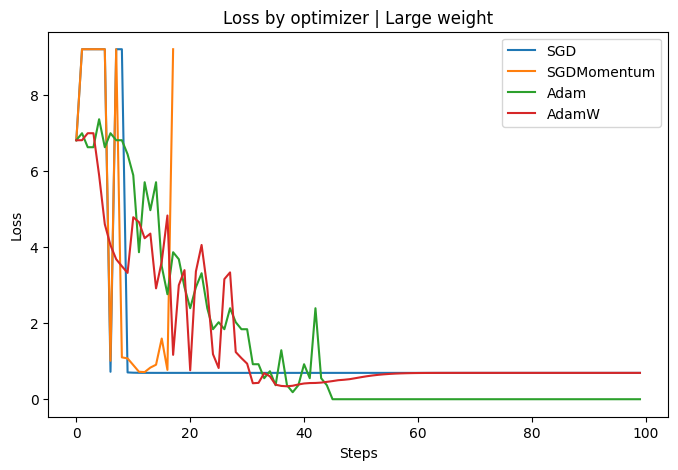

In [197]:
### LARGE INIT
plt.figure(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_large)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Large weight")
plt.show()

SGD final loss: 0.0570 Variance of loss: 0.1431267150587648
SGDMomentum final loss: nan Variance of loss: nan
Adam final loss: 0.1507 Variance of loss: 0.026463302840262454
AdamW final loss: 0.6931 Variance of loss: 6.51563958816459e-06


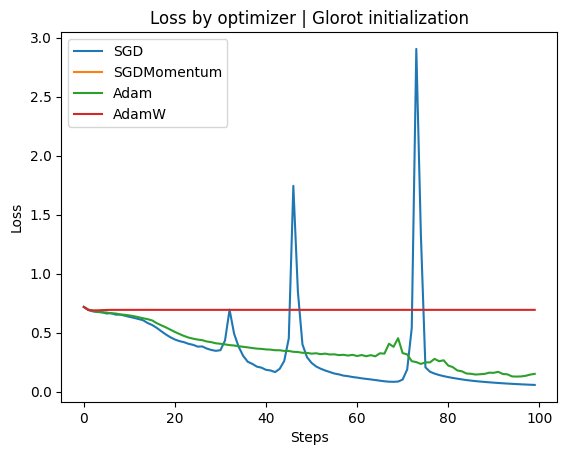

In [198]:
### Glorot INIT
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_glorot)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Glorot initialization")
plt.show()

# Collaboration / External Help
Disclose any help you used (LLM usage, blogs, search, Github links, etc) and collaborations with your classmates. If you  completed the homework on your own, you can leave this part empty.

> Collaborated with ChatGPT